>Let's try using a Random Forest on the same training data to see how that affects performance.

In [6]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators= 100, random_state= 50, verbose= 1, n_jobs= -1)

In [7]:
FILE_NAME = "preprocess.ipynb"
PARENT_DIR = os.path.abspath(os.path.join(os.path.dirname(FILE_NAME), "."))
app_train = pd.read_csv( PARENT_DIR + '/data/processed_train.csv')
app_test = pd.read_csv( PARENT_DIR + '/data/processed_test.csv')

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 121)
Testing Features shape:  (48744, 120)


In [8]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 245)
Testing Features shape:  (48744, 241)


In [9]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 242)
Testing Features shape:  (48744, 241)


In [10]:
app_train

,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,...,0,0,0,0,0,1,0,1,0,1
1,1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,...,1,0,0,0,0,0,0,1,0,0
2,2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,...,0,0,0,0,0,0,0,0,0,0
3,3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,...,0,0,0,0,0,0,0,0,0,0
4,4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,...,0,0,0,0,0,1,0,1,0,0
307507,307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,NaN,...,0,0,0,0,0,1,0,1,0,0
307508,307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921.0,...,0,0,0,0,1,0,0,1,0,0
307509,307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786.0,...,0,0,0,0,0,1,0,1,0,1


In [11]:
# Drop the target from training data

if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()



train_labels = app_train['TARGET']

In [12]:
# Train on the training data
# random_forest.fit(train, train_labels)

# the error below is not a big deal, 
# we now know the rf does not allow NaN,
# we'll fix the bug afterwise


In [13]:
# Still use the median strategy 
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
# Drop the target from training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data 
test = app_test.copy()

# Median imputation of missing values
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='median')

# Scale each feature to 0-1 (Normalization)
scaler1 = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))

# Fit on the training data
imputer1.fit(train)
imputer2.fit(test)

# Transform both training data and testing data
train = imputer1.transform(train)
test = imputer2.transform(test)

# Repeate with the scaler
scaler1.fit(train)
scaler2.fit(test)
train = scaler1.transform(train)
test = scaler2.transform(test)

print('Training data shape:', train.shape)
print('Testing data shape:', test.shape)



Training data shape: (307511, 241)
Testing data shape: (48744, 241)


In [14]:
# Train on the training data
random_forest.fit(train, train_labels)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [15]:
train[:20]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.25192677e-06, 2.80699391e-06, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.50385353e-06, 5.61398781e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.52827550e-05, 5.33328842e-05, 5.26315789e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.85346818e-05, 5.61398781e-05, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.17866086e-05, 5.89468720e-05, 5.26315789e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [16]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


In [17]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission to a csv file
FILE_NAME = "preprocess.ipynb"
PARENT_DIR = os.path.abspath(os.path.join(os.path.dirname(FILE_NAME), "."))


submit.to_csv(PARENT_DIR + '/result/random_forest_baseline.csv', index = False)

In [18]:
# calculate the accuracy
from sklearn.model_selection import train_test_split

# 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size = 0.3, stratify = train_labels)
X_train



array([[0.50260479, 0.50283366, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7463367 , 0.74615231, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.41602224, 0.41648772, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.58325258, 0.58339158, 0.10526316, ..., 0.        , 1.        ,
        0.        ],
       [0.66246301, 0.66292494, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22319599, 0.22343391, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [19]:
# retraining
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features,
                                    'importance': feature_importance_values})

# Make predictions on the test data
predictions_val = random_forest.predict_proba(X_test)[:, 1]

In [20]:
predictions_val.shape

(92254,)

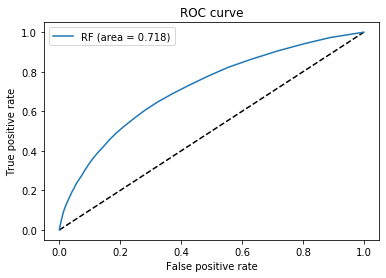

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, predictions_val)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# 正确率在0.712左右

In [22]:
random_forest.score(X_test,y_test)

0.9194072885728533